In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


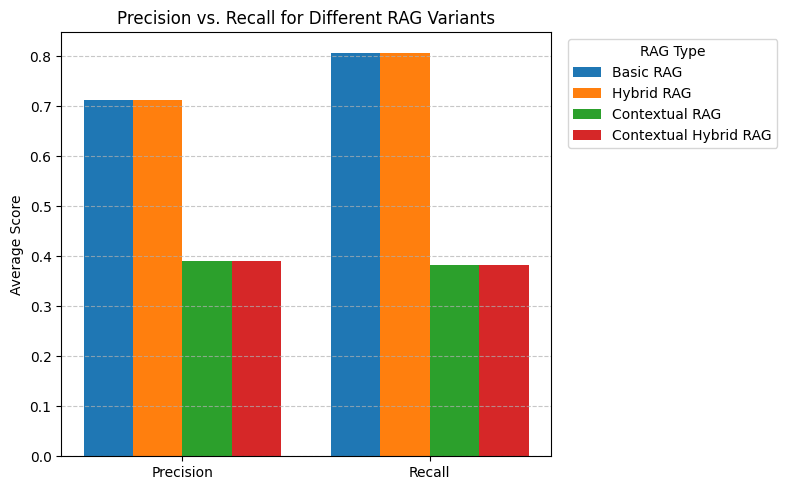

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_pickle("results/retrieval_eval_results_QwenQwen3-Embedding-4B_10_n50_topk10.pkl")

# Define your four RAG variants and the helper to pull out single‐item lists
rag_types = [
    "Basic RAG",
    "Hybrid RAG",
    "Contextual RAG",
    "Contextual Hybrid RAG",
]

def mean_from_list_col(series: pd.Series) -> float:
    cleaned = (
        series.dropna()
              .apply(lambda x: x[0] if isinstance(x, (list,tuple)) and len(x)==1 else x)
              .astype(float)
    )
    return cleaned.mean()

# Build lists of precision‐means and recall‐means
prec_means = []
rec_means  = []
for rt in rag_types:
    prec_col = f"{rt}_precision"
    rec_col  = f"{rt}_recall"
    prec_means.append(mean_from_list_col(df[prec_col]))
    rec_means .append(mean_from_list_col(df[rec_col]))

# x positions for the two metric groups
groups = ["Precision", "Recall"]
x = np.arange(len(groups))

# bar width and offsets so the 4 RAG types sit side-by-side in each group
total_width = 0.8
bar_width   = total_width / len(rag_types)
offsets     = np.linspace(
    -total_width/2 + bar_width/2,
     total_width/2 - bar_width/2,
     len(rag_types)
)

# plot
plt.figure(figsize=(8, 5))
for i, rt in enumerate(rag_types):
    heights = [prec_means[i], rec_means[i]]
    plt.bar(x + offsets[i], heights, bar_width, label=rt)

plt.xticks(x, groups)
plt.ylabel("Average Score")
plt.title("Precision vs. Recall for Different RAG Variants")
plt.legend(title="RAG Type", bbox_to_anchor=(1.02, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()